# 부동산 데이터 수집 및 분석

>셀레니움으로 url 실행

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

url='https://new.land.naver.com/complexes'
driver=webdriver.Chrome(service=Service("C:/venv/driver/chromedriver-win64/chromedriver.exe"))

driver.get(url)

>검색창에 '은마아파드' 입력 후 enter

In [2]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

search_doc=driver.find_element(By.CSS_SELECTOR,'#land_search')
search_doc.send_keys('은마아파트')
search_doc.send_keys(Keys.ENTER)

>검색결과에서 대치동 은마아파트 선택

In [3]:
driver.find_element(By.CSS_SELECTOR,'#ct > div.map_wrap > div.search_panel > div.list_contents > div > div > div:nth-child(1) > div > a > div.title').click()

>시세/실거래가 버튼 클릭

In [4]:
driver.find_element(By.CSS_SELECTOR,'#summaryInfo > div.complex_summary_info > div.complex_detail_link > button:nth-child(2)').click()

> 더보기 버튼까지 스크롤 내림

In [5]:
detail_button=driver.find_element(By.CSS_SELECTOR,'#tabpanel1 > div:nth-child(7) > button')

In [6]:
driver.execute_script("arguments[0].scrollIntoView(false)",detail_button)

> 2019년 데이터가 나올때까지 더보기 클릭
맨 밑 날자데이터 문자열이 '2018'로 시작하기 전까지 무한 반복문

In [172]:
import time
driver.find_element(By.CSS_SELECTOR,'#tabpanel1 > div:nth-child(6) > div > button:nth-child(2)').click()
time.sleep(0.5)
detail_button=driver.find_element(By.CSS_SELECTOR,'#tabpanel1 > div:nth-child(7) > button')

while(True):
    time.sleep(0.5)    
    driver.execute_script("arguments[0].scrollIntoView(false)",detail_button)
    
    
    info=driver.find_element(By.CSS_SELECTOR,'#tabpanel1 > div:nth-child(7) > table > tbody')
    date=info.find_elements(By.TAG_NAME,'th')
    i=date[-1].get_attribute('innerText')
    if i[0:4] == '2018':
        break
    else:
        detail_button.click()
    

> 하위평균가, 일반평균가, 상위평균가, 매매가 대비 전세가 정보 리스트로 저장

In [173]:
a=info.find_elements(By.TAG_NAME,'td')
a[0].get_attribute('innerText')

'22억9,333'

In [174]:
print(len(a))

1024


>날짜 정보 저장

In [175]:
date_list=[]

for i in range(len(date)):
    date_list.append(date[i].get_attribute('innerText'))
    
date_list

['2024.01.26.',
 '2024.01.19.',
 '2024.01.12.',
 '2024.01.05.',
 '2023.12.29.',
 '2023.12.22.',
 '2023.12.15.',
 '2023.12.08.',
 '2023.12.01.',
 '2023.11.24.',
 '2023.11.17.',
 '2023.11.10.',
 '2023.11.03.',
 '2023.10.27.',
 '2023.10.20.',
 '2023.10.13.',
 '2023.09.29.',
 '2023.09.22.',
 '2023.09.15.',
 '2023.09.08.',
 '2023.09.01.',
 '2023.08.25.',
 '2023.08.18.',
 '2023.08.11.',
 '2023.08.04.',
 '2023.07.28.',
 '2023.07.21.',
 '2023.07.14.',
 '2023.07.07.',
 '2023.06.30.',
 '2023.06.23.',
 '2023.06.16.',
 '2023.06.09.',
 '2023.06.02.',
 '2023.05.26.',
 '2023.05.19.',
 '2023.05.12.',
 '2023.05.05.',
 '2023.04.28.',
 '2023.04.21.',
 '2023.04.14.',
 '2023.04.07.',
 '2023.03.31.',
 '2023.03.24.',
 '2023.03.17.',
 '2023.03.10.',
 '2023.03.03.',
 '2023.02.24.',
 '2023.02.17.',
 '2023.02.10.',
 '2023.02.03.',
 '2023.01.20.',
 '2023.01.13.',
 '2023.01.06.',
 '2022.12.30.',
 '2022.12.23.',
 '2022.12.16.',
 '2022.12.09.',
 '2022.12.02.',
 '2022.11.25.',
 '2022.11.18.',
 '2022.11.11.',
 '2022.1

In [176]:
len(date_list)

256

> 정보 리스트 각각 하위, 일반, 상위 리스트로 분리

In [177]:
low_list=[]
gen_list=[]
high_list=[]
i=0

while(i < len(a)):
    low_list.append(a[i].get_attribute('innerText'))
    gen_list.append(a[i+1].get_attribute('innerText'))
    high_list.append(a[i+2].get_attribute('innerText'))
    i=i+4
    
low_list,gen_list,high_list

(['22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억9,333',
  '22억8,667',
  '22억8,667',
  '22억3,667',
  '22억3,667',
  '22억3,667',
  '22억1,000',
  '22억1,000',
  '22억667',
  '22억667',
  '21억7,333',
  '21억7,333',
  '21억7,333',
  '21억7,333',
  '21억7,333',
  '21억7,333',
  '21억7,333',
  '21억5,667',
  '21억3,333',
  '20억8,333',
  '20억6,667',
  '20억3,333',
  '20억1,667',
  '19억7,667',
  '19억6,000',
  '19억4,333',
  '19억4,333',
  '19억667',
  '18억9,667',
  '18억9,667',
  '18억9,667',
  '18억9,667',
  '18억9,000',
  '18억9,000',
  '18억6,667',
  '18억6,000',
  '18억4,333',
  '18억4,333',
  '18억4,333',
  '18억2,667',
  '18억1,667',
  '18억1,667',
  '18억1,667',
  '18억1,667',
  '18억6,667',
  '18억8,333',
  '18억8,333',
  '19억',
  '19억',
  '19억3,333',
  '20억',
  '20억2,333',
  '20억4,333',
  '20억6,000',
  '21억5,000',
  '22억3,333',
  '22억5,000',
  '22억8,333',
  '23억1,000',
  '23억1,000',

> 가격 정보에서, '억'과 쉼표 제거 후 int형으로 변환

In [208]:
low_list2=[]
for i in range(len(low_list)):
    if len(low_list[i])>3:
        price=(int(low_list[i].split('억')[0])*100000000+int(low_list[i].split('억')[1].replace(',',''))*10000)
        low_list2.append(price)
    else:
        price=int(low_list[i].replace('억',''))*100000000
        low_list2.append(price)
low_list2, len(low_list2)

([2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2293330000,
  2286670000,
  2286670000,
  2236670000,
  2236670000,
  2236670000,
  2210000000,
  2210000000,
  2206670000,
  2206670000,
  2173330000,
  2173330000,
  2173330000,
  2173330000,
  2173330000,
  2173330000,
  2173330000,
  2156670000,
  2133330000,
  2083330000,
  2066670000,
  2033330000,
  2016670000,
  1976670000,
  1960000000,
  1943330000,
  1943330000,
  1906670000,
  1896670000,
  1896670000,
  1896670000,
  1896670000,
  1890000000,
  1890000000,
  1866670000,
  1860000000,
  1843330000,
  1843330000,
  1843330000,
  1826670000,
  1816670000,
  1816670000,
  1816670000,
  1816670000,
  1866670000,
  1883330000,
  1883330000,
  1900000000,
  1900000000,
  1933330000,
  2000000000,
  2023330000,
  2043330000,
  2060000000,
  2150000000,
  2233330000,
  2250000000,
  2283330000,
  2310

In [209]:
gen_list2=[]
for i in range(len(gen_list)):
    if len(gen_list[i])>3:
        price=(int(gen_list[i].split('억')[0])*100000000+int(gen_list[i].split('억')[1].replace(',',''))*10000)
        gen_list2.append(price)
    else:
        price=int(gen_list[i].replace('억',''))*100000000
        gen_list2.append(price)

In [210]:
high_list2=[]
for i in range(len(high_list)):
    if len(high_list[i])>3:
        price=(int(high_list[i].split('억')[0])*100000000+int(high_list[i].split('억')[1].replace(',',''))*10000)
        high_list2.append(price)
    else:
        price=int(high_list[i].replace('억',''))*100000000
        high_list2.append(price)

>날짜 정보에서 일 정보 삭제

In [224]:
date_list2=[]
for i in range(len(high_list)):
    date_list2.append(date_list[i][0:7])
    
date_list2

['2024.01',
 '2024.01',
 '2024.01',
 '2024.01',
 '2023.12',
 '2023.12',
 '2023.12',
 '2023.12',
 '2023.12',
 '2023.11',
 '2023.11',
 '2023.11',
 '2023.11',
 '2023.10',
 '2023.10',
 '2023.10',
 '2023.09',
 '2023.09',
 '2023.09',
 '2023.09',
 '2023.09',
 '2023.08',
 '2023.08',
 '2023.08',
 '2023.08',
 '2023.07',
 '2023.07',
 '2023.07',
 '2023.07',
 '2023.06',
 '2023.06',
 '2023.06',
 '2023.06',
 '2023.06',
 '2023.05',
 '2023.05',
 '2023.05',
 '2023.05',
 '2023.04',
 '2023.04',
 '2023.04',
 '2023.04',
 '2023.03',
 '2023.03',
 '2023.03',
 '2023.03',
 '2023.03',
 '2023.02',
 '2023.02',
 '2023.02',
 '2023.02',
 '2023.01',
 '2023.01',
 '2023.01',
 '2022.12',
 '2022.12',
 '2022.12',
 '2022.12',
 '2022.12',
 '2022.11',
 '2022.11',
 '2022.11',
 '2022.11',
 '2022.10',
 '2022.10',
 '2022.10',
 '2022.10',
 '2022.09',
 '2022.09',
 '2022.09',
 '2022.09',
 '2022.08',
 '2022.08',
 '2022.08',
 '2022.08',
 '2022.07',
 '2022.07',
 '2022.07',
 '2022.07',
 '2022.07',
 '2022.06',
 '2022.06',
 '2022.06',
 '20

>데이터프레임 생성

In [226]:
import pandas as pd 

df=pd.DataFrame({'날짜':date_list2,'하위평균가':low_list2,'일반평균가':gen_list2,'상위평균가':high_list2})

In [227]:
df.head()

,날짜,하위평균가,일반평균가,상위평균가
0,2024.01,2293330000,2343330000,2416670000
1,2024.01,2293330000,2343330000,2416670000
2,2024.01,2293330000,2343330000,2423330000
3,2024.01,2293330000,2343330000,2446670000
4,2023.12,2293330000,2343330000,2446670000


>데이터프레임 합치기

In [266]:
import numpy as np

df_month=pd.pivot_table(data=df,index='날짜',values=['하위평균가','일반평균가','상위평균가'],aggfunc=np.mean)

In [267]:
df_month

,상위평균가,일반평균가,하위평균가
날짜,,,
2018.12,1.690000e+09,1.643333e+09,1.596667e+09
2019.01,1.641250e+09,1.602500e+09,1.541250e+09
2019.02,1.581667e+09,1.540833e+09,1.490000e+09
2019.03,1.553000e+09,1.502000e+09,1.456000e+09
2019.04,1.606250e+09,1.551250e+09,1.501250e+09
...,...,...,...
2023.09,2.341666e+09,2.266002e+09,2.226002e+09
2023.10,2.435557e+09,2.336663e+09,2.288890e+09
2023.11,2.446670e+09,2.343330e+09,2.293330e+09


In [268]:
df_month.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 2018.12 to 2024.01
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상위평균가   62 non-null     float64
 1   일반평균가   62 non-null     float64
 2   하위평균가   62 non-null     float64
dtypes: float64(3)
memory usage: 1.9+ KB


>꺾은선 그래프 그리기

<function matplotlib.pyplot.show(close=None, block=None)>

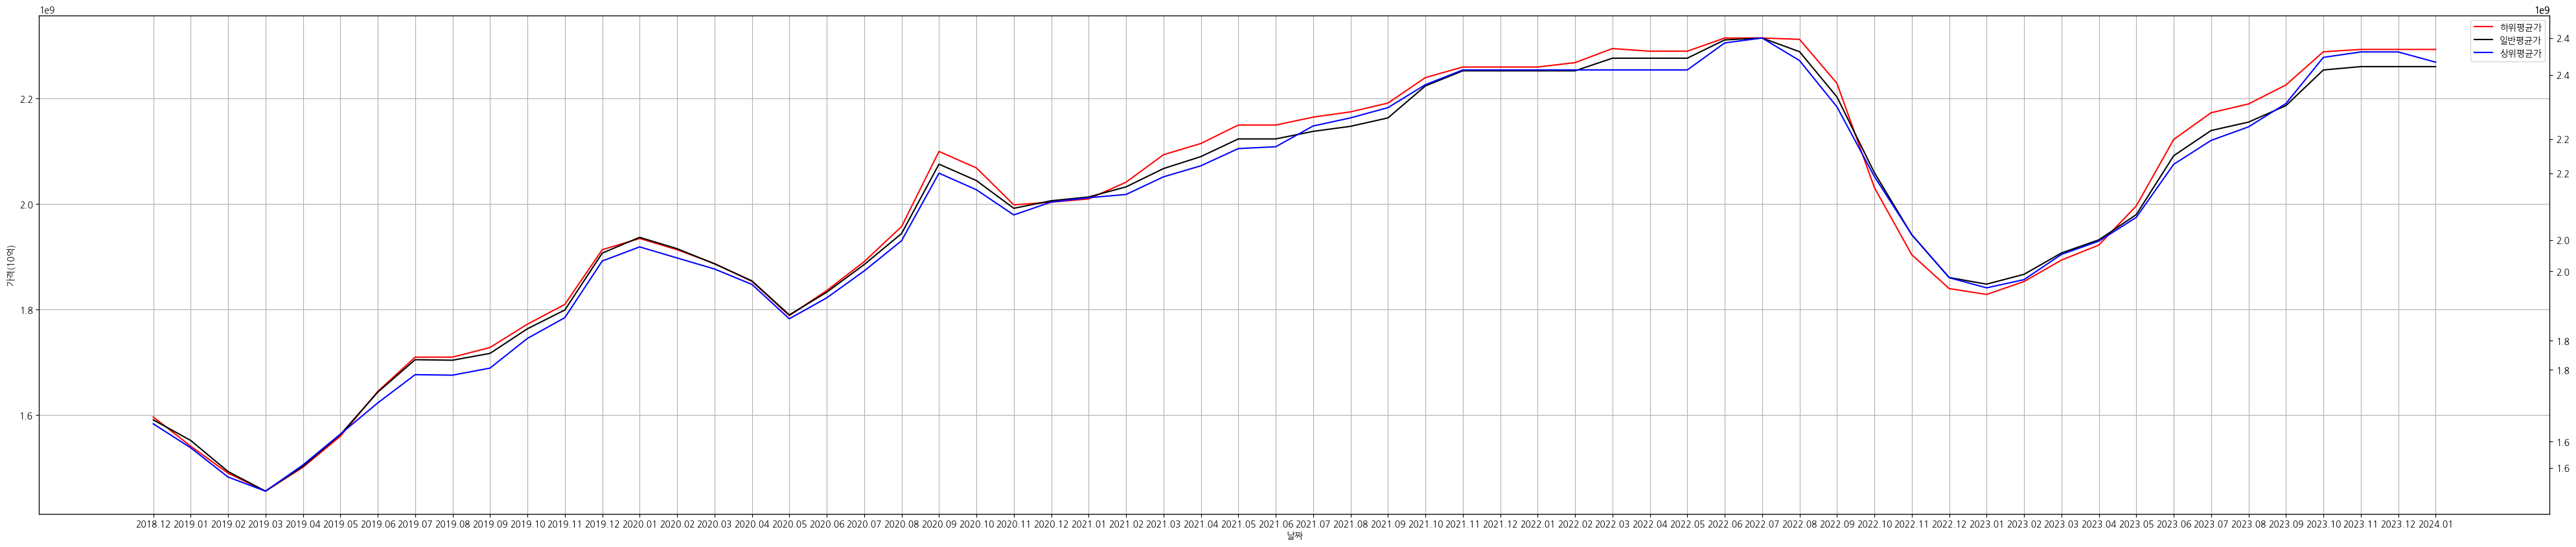

In [269]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

fig, ax1= plt.subplots(figsize=(50,10))

ax2=ax1.twinx()
ax3=ax1.twinx()
graph1=ax1.plot(df_month.index,df_month['하위평균가'],label='하위평균가',color='red')
graph2=ax2.plot(df_month.index,df_month['일반평균가'],label='일반평균가',color='black')
graph3=ax3.plot(df_month.index,df_month['상위평균가'],label='상위평균가',color='blue')
graphs=graph1+graph2+graph3
labs=[l.get_label() for l in graphs]
ax1.legend(graphs,labs,loc=0)

ax1.grid()
ax1.set_xlabel("날짜")
ax1.set_ylabel("가격(10억)")
plt.show

# 2020.12
양도세 유예정책(다주택자 매도 유인책) + 코로나로 인한 경기 침체(재건축 아파트: 투자 상품, 시장 변화에 민감하게 반응)

# 2022.07 하락 : 금리 인상
금리 인상>전세자금대출 부담 증가>​전세가격 하락>가격지지선 붕괴,가격하락
금리 인상 중단되며 다시 반등

>Box Plot

In [270]:
df_month['년']=[year.split('.')[0] for year in df_month.index]
df_month['월']=[month.split('.')[1] for month in df_month.index]

df_month.head()


,상위평균가,일반평균가,하위평균가,년,월
날짜,,,,,
2018.12,1.690000e+09,1.643333e+09,1.596667e+09,2018,12
2019.01,1.641250e+09,1.602500e+09,1.541250e+09,2019,01
2019.02,1.581667e+09,1.540833e+09,1.490000e+09,2019,02
2019.03,1.553000e+09,1.502000e+09,1.456000e+09,2019,03
2019.04,1.606250e+09,1.551250e+09,1.501250e+09,2019,04


>정보가 별로 없는 2018년과 2024년의 정보 삭제

In [290]:
df_month=df_month[df_month['년']!='2018']
df_month=df_month[df_month['년']!='2024']
df_month.tail()

,상위평균가,일반평균가,하위평균가,년,월
날짜,,,,,
2023.08,2.294170e+09,2.233335e+09,2.190000e+09,2023,08
2023.09,2.341666e+09,2.266002e+09,2.226002e+09,2023,09
2023.10,2.435557e+09,2.336663e+09,2.288890e+09,2023,10
2023.11,2.446670e+09,2.343330e+09,2.293330e+09,2023,11
2023.12,2.446670e+09,2.343330e+09,2.293330e+09,2023,12


C:\Users\User\AppData\Local\Temp\ipykernel_3188\165409471.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='년',y='일반평균가',data=df_month,palette='Set1')


<Axes: xlabel='년', ylabel='일반평균가'>

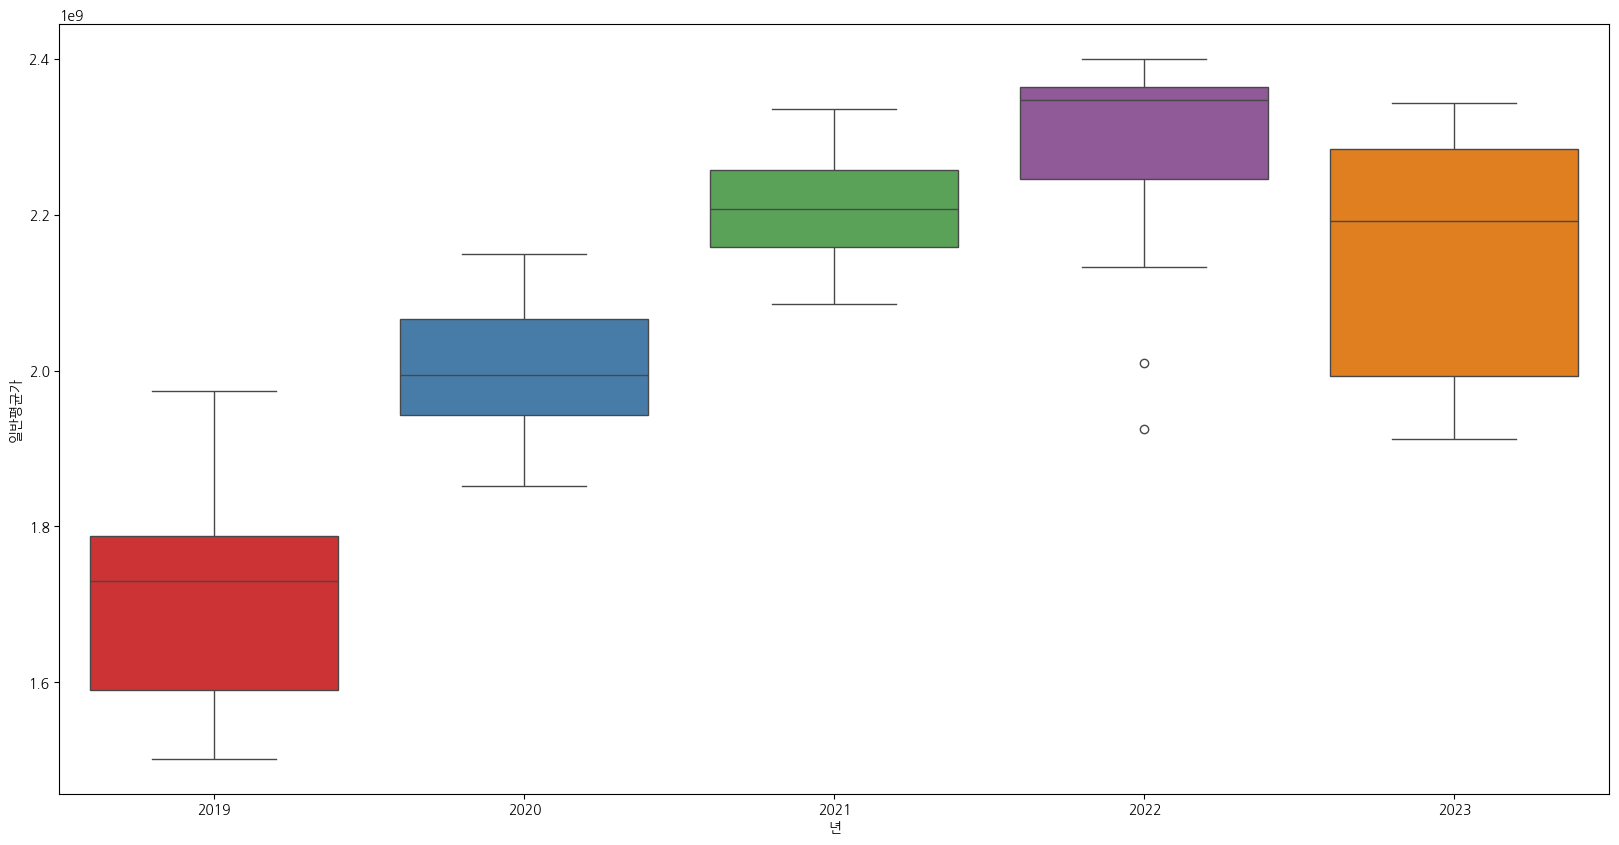

In [300]:
import seaborn as sns

plt.figure(figsize=(20,10))
sns.boxplot(x='년',y='일반평균가',data=df_month,palette='Set1')

>Heatmap

In [291]:
df_new=pd.pivot_table(data=df_month,index='년',columns='월',values='일반평균가',aggfunc=np.mean)

In [292]:
df_new.head(6)

월,01,02,03,04,05,06,07,08,09,10,11,12
년,,,,,,,,,,,,
2019,1.602500e+09,1.540833e+09,1.502000e+09,1.551250e+09,1.614000e+09,1.698125e+09,1.762500e+09,1.761500e+09,1.775000e+09,1.823750e+09,1.861000e+09,1.973750e+09
2020,2.005000e+09,1.982500e+09,1.952500e+09,1.918750e+09,1.851250e+09,1.896250e+09,1.951000e+09,2.012500e+09,2.150000e+09,2.117500e+09,2.062500e+09,2.077500e+09
2021,2.085000e+09,2.105000e+09,2.141250e+09,2.165000e+09,2.200000e+09,2.200000e+09,2.215000e+09,2.225000e+09,2.241667e+09,2.305000e+09,2.335000e+09,2.335000e+09
2022,2.335000e+09,2.335000e+09,2.360000e+09,2.360000e+09,2.360000e+09,2.396250e+09,2.400000e+09,2.372918e+09,2.283332e+09,2.133335e+09,2.010002e+09,1.925336e+09
2023,1.912223e+09,1.931665e+09,1.974002e+09,2.000000e+09,2.050000e+09,2.166668e+09,2.216670e+09,2.233335e+09,2.266002e+09,2.336663e+09,2.343330e+09,2.343330e+09


<function matplotlib.pyplot.show(close=None, block=None)>

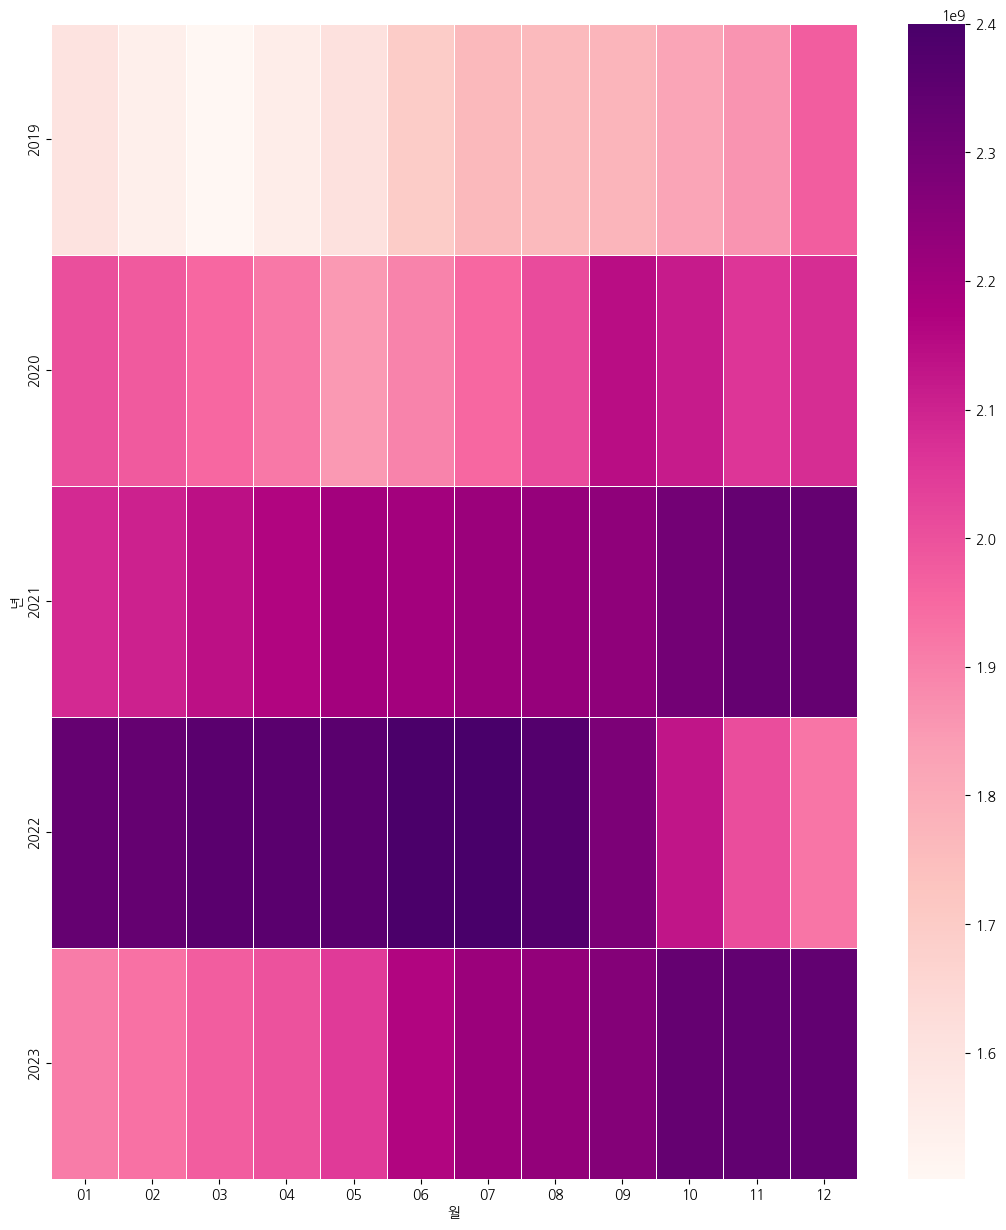

In [293]:
plt.figure(figsize=(13,15))
sns.heatmap(df_new,linewidths=.5,cmap='RdPu',fmt='g')
plt.show

# 양재역 주변 매매 평균가 계산

In [389]:
url='https://new.land.naver.com/complexes'
driver=webdriver.Chrome(service=Service("C:/venv/driver/chromedriver-win64/chromedriver.exe"))

driver.get(url)

In [390]:
search_doc=driver.find_element(By.CSS_SELECTOR,'#land_search')
search_doc.send_keys('양재역')
search_doc.send_keys(Keys.ENTER)

In [391]:
driver.find_element(By.CSS_SELECTOR,'#ct > div.map_wrap > div.search_panel > div.list_contents > div > div > div:nth-child(1) > div > a').click()

> 팝업에 관련된 정보 크롤링

In [392]:
a=driver.find_elements(By.CLASS_NAME,'complex_price_wrap')

> 모든 정보 중 매매가에 대한 정보만 추출하여 float형으로 저장

In [393]:
import re

price_list=[]

for i in range(len(a)):
    b=a[i].get_attribute('innerText')
    if b[:1]=='매':
        #price_list.append(b)
        price_list.append(float(re.search('\d+\.?\d?\d?',b).group()))

In [394]:
price_list

[16.0,
 13.0,
 69.0,
 57.0,
 41.5,
 13.6,
 14.8,
 16.0,
 13.0,
 2.62,
 10.5,
 18.75,
 5.77,
 30.0,
 16.0,
 20.0,
 16.5,
 19.0,
 10.0,
 48.0,
 4.5,
 27.0,
 19.3,
 6.5,
 26.0,
 12.0,
 13.0,
 9.5,
 11.5,
 32.0,
 4.5,
 15.0,
 10.5,
 13.0,
 28.8,
 12.0,
 21.0,
 13.5,
 17.3,
 20.0,
 7.9,
 10.65,
 26.0,
 7.0,
 20.0,
 26.8,
 24.0,
 4.85,
 17.9,
 19.0,
 4.7,
 29.0,
 38.0,
 30.5,
 25.0,
 26.0,
 19.5,
 28.0,
 23.0,
 19.0,
 30.0,
 8.9,
 10.0,
 13.9,
 15.0,
 63.0,
 10.5,
 14.2,
 15.0,
 11.0,
 15.0,
 6.6,
 14.0,
 14.9,
 31.0,
 14.8,
 25.0,
 21.5,
 16.5,
 19.0,
 9.62,
 13.5,
 12.8,
 21.25,
 14.6,
 18.0,
 2.7,
 24.25,
 17.0,
 25.0,
 31.7,
 39.0,
 14.4,
 20.0,
 4.2,
 5.1,
 24.0,
 14.0,
 11.5,
 30.0,
 11.3,
 14.75,
 13.5,
 9.75,
 2.65,
 10.5,
 27.0,
 16.0,
 13.5,
 15.3,
 22.0,
 45.0,
 5.45,
 19.0,
 19.5,
 18.0,
 26.0,
 22.5,
 22.0,
 3.6,
 35.0,
 1.92,
 23.5,
 20.0,
 18.5,
 27.0,
 23.5,
 11.0,
 31.0,
 19.0,
 23.5,
 25.0,
 21.5,
 45.0,
 3.45,
 12.8,
 29.0,
 22.0,
 15.0,
 12.0,
 10.0,
 12.3,
 12.0,
 3.8,
 

In [396]:
len(price_list)

164

>평균 계산

In [395]:
mean_price=(np.mean(price_list))
result=str(mean_price)[0:2]+'억'+str(mean_price)[3:7]+'만원'
result

'18억8108만원'